# Automobile Insurance Claims- Fraud Detection
### Problem Statement:
**Business case:**
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

### Import Neccessory libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the data set
df = pd.read_csv(r"D:\data scienctist\projects\Evolution Projects\Evolution projects data\Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


So here we can see The dataset contains the details of Automobile Insurance data.

This dataset is comprised of 1000 rows and 40 columns including one target varibale i.e. 'fraud_reported'. where we need to predict whether the aproved insurance is a fraud or not.
There are two unique values in the target column Y (yes) and N (no).
The target variable that is 'fraud_reported' has two classes, hence this is a classification data problem. We will look more into the dataset in the EDA part

##  Exploratory Data Analysis(EDA) & Feature Engineering:

In [3]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

So here we can see the dataset contains different features with different data types.
* There are two types of data namely object type(21 columns) and int64/float64 data type(19 columns).
* We will take care of the object datatype using encoding techniques later.

In [4]:
# checking the null values in the dataframe
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

* Our last column _c39 have all null values hence dropping the column.

In [5]:
df.drop('_c39', axis = 1 , inplace = True)

In [6]:
# Checking duplicated values

df.duplicated().sum()

0

In [7]:
#Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [8]:
#Checking the value counts of each of the columns
for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
___________________________________
""")

 Column 'months_as_customer' :
194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
___________________________________

 Column 'age' :
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
___________________________________

 Column 'policy_number' :
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
___________________________________

 Column 'policy_bind_date' :
05-08-1992    3
28

* We dont see any Null values present, but we do '?' present in some columns. (In Column 'collision_type', 'property_damage', 'police_report_available'), we need to replace them with suitable values.

In [9]:
# Lets check which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

## Data Visualization:

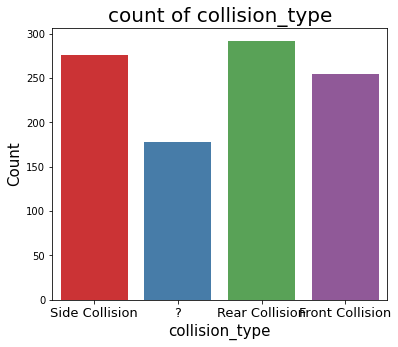

In [10]:
# Visualizing the counts for collision_type
plt.figure(figsize=(6,5))
sns.countplot(df['collision_type'],palette = 'Set1')

plt.title('count of collision_type',fontsize=20)
plt.xlabel('collision_type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Here we can see that, most of the cases are of rear collision. we will treat '?' as a unknown type of collision.

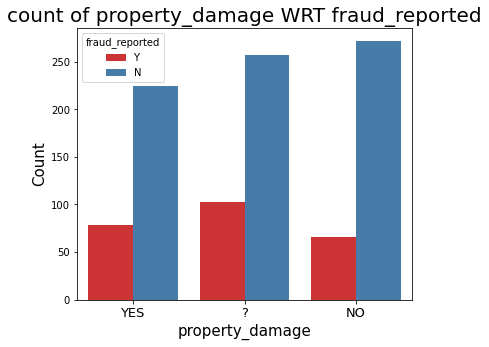

In [12]:
# Visualizing the count of property_damage WRT fraud_reported
plt.figure(figsize=(6,5))
sns.countplot(x = 'property_damage',hue = 'fraud_reported', data = df,palette = 'Set1')

plt.title('count of property_damage WRT fraud_reported',fontsize=20)
plt.xlabel('property_damage',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* By looking at the above plot we can say that most number of cases shows no property_damage and '?' mark, we will treat '?' as no property_damage

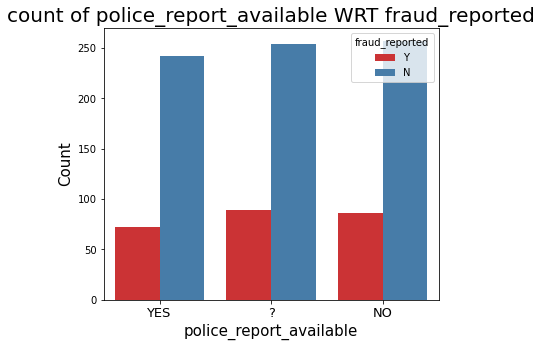

In [13]:
# Visualizing the count of police_report_available WRT fraud_reported'
plt.figure(figsize=(6,5))
sns.countplot(x = 'police_report_available',hue = 'fraud_reported', data = df,palette = 'Set1')

plt.title('count of police_report_available WRT fraud_reported',fontsize=20)
plt.xlabel('police_report_available',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Above plot shows nearly same number of each category, we will treat '?' as No police_report_available.

N    753
Y    247
Name: fraud_reported, dtype: int64


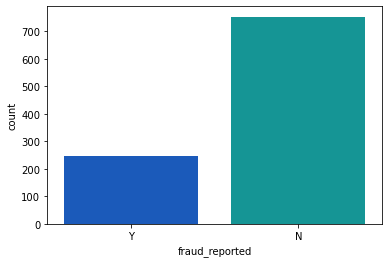

In [15]:
#lets have a look on our target variable
sns.countplot(df['fraud_reported'],palette = 'winter')
print(df['fraud_reported'].value_counts())
plt.show()

* We have more number of cases where fraud was not reported.

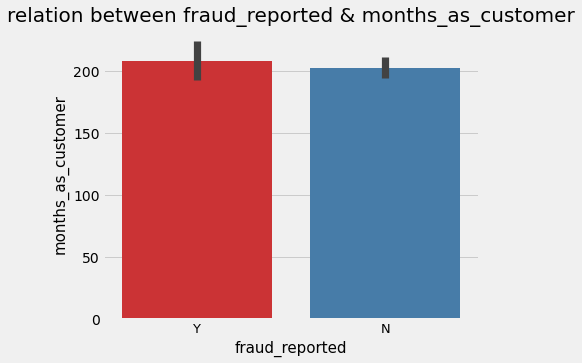

In [19]:
# Visualizing how months_as_customer affects target varaible
plt.figure(figsize=(6,5))
sns.barplot(x = "fraud_reported", y = "months_as_customer", data = df,palette = 'Set1')

plt.title('relation between fraud_reported & months_as_customer',fontsize=20)
plt.xlabel('fraud_reported',fontsize=15)
plt.ylabel('months_as_customer',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* We can see that, it doesn't matter for how many months the customer is bounded with the company to check fraud report.

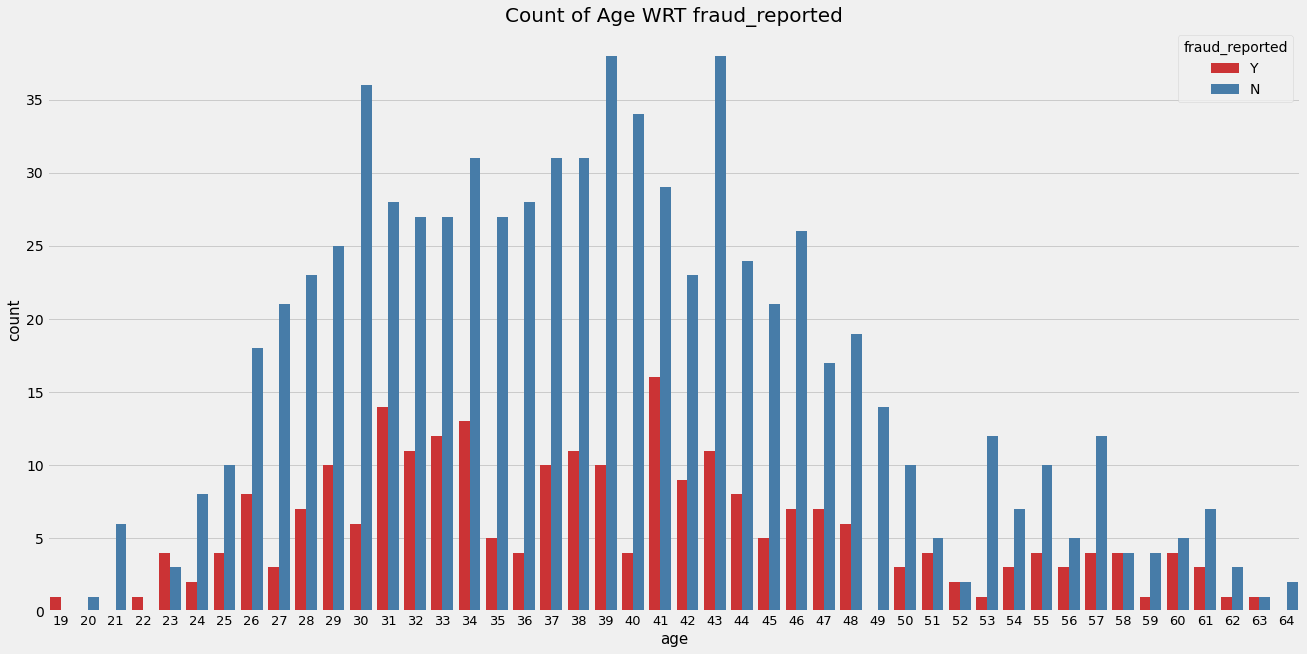

In [27]:
# lets check the fraud_report based on age

plt.figure(figsize = (20,10))
sns.countplot(x = 'age', hue = 'fraud_reported', data = df, palette = 'Set1')

plt.title('Count of Age WRT fraud_reported',fontsize=20)
plt.xlabel('age',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Here we can conclude that customer of age range between 19 to 23 has more tendency to reported as fraud than not a fraud.

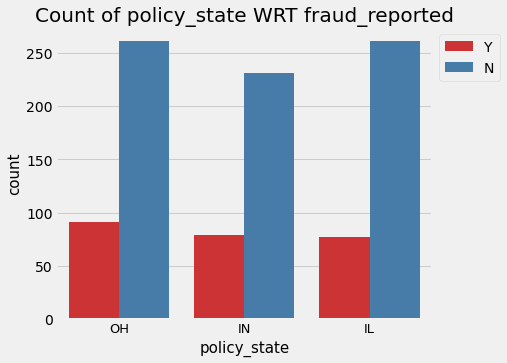

In [30]:
# count of fraud_report based on policy_state 

plt.figure(figsize = (6,5))
sns.countplot(x = 'policy_state', hue = 'fraud_reported', data = df, palette = 'Set1')

plt.legend( bbox_to_anchor = (1, 1), loc = 'upper left')
plt.title('Count of policy_state WRT fraud_reported',fontsize=20)
plt.xlabel('policy_state',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* We can see every policy_state having approximately same ratio of reporting as fraud to not a fraud.

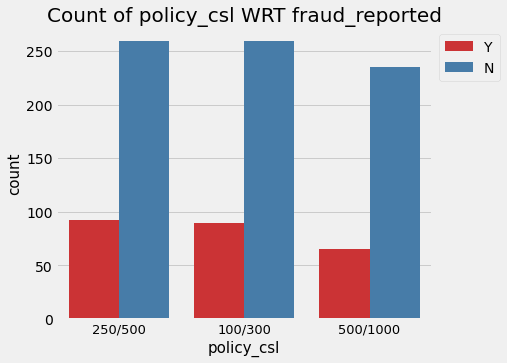

In [31]:
# count of fraud_report based on policy_csl 

plt.figure(figsize = (6,5))
sns.countplot(x = 'policy_csl', hue = 'fraud_reported', data = df, palette = 'Set1')

plt.legend( bbox_to_anchor = (1, 1), loc = 'upper left')
plt.title('Count of policy_csl WRT fraud_reported',fontsize=20)
plt.xlabel('policy_csl',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* we can clearly say that, policy_csl '500/1000' has less counts compared to others.

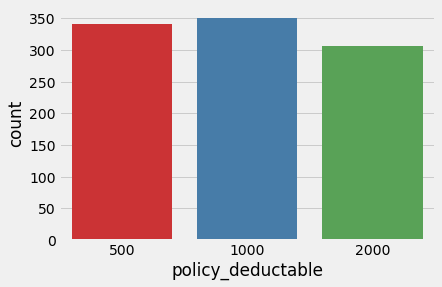

In [33]:
# count of policy_deductable.
sns.countplot(df['policy_deductable'], palette = 'Set1')
plt.show()

* This will tell us that there are more number of policy_deductable of 1000 and 500 than 2000.

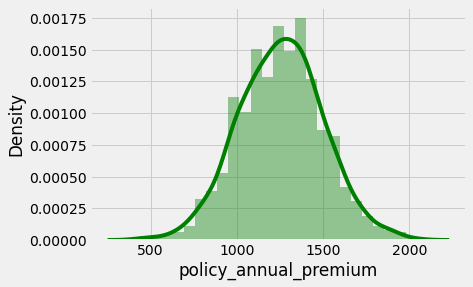

In [37]:
#lets have a look at destribution of policy_annual_premium
sns.distplot(df['policy_annual_premium'], color = 'g')
plt.show()

* here we see that policy_annual_premium is mostly ditributed in the range of 1000 to 1500.

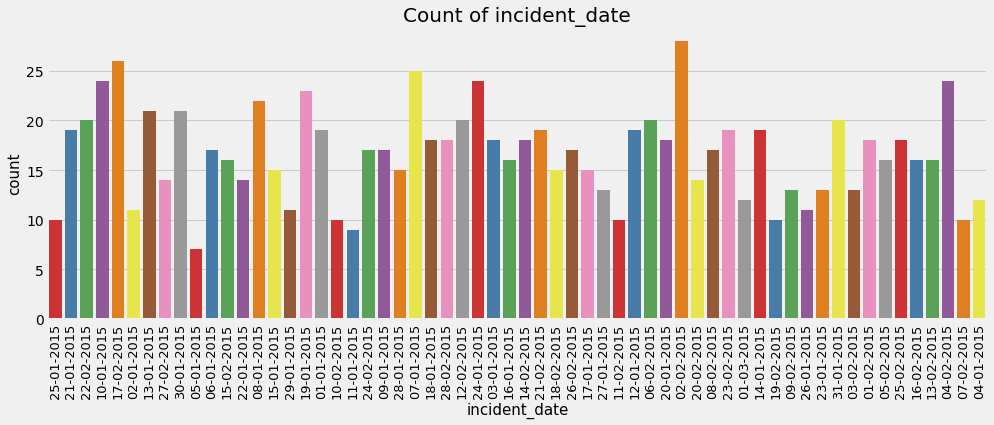

In [74]:
# visualizing the count of auto_make.

plt.figure(figsize = (15,5))
sns.countplot(x='incident_date', data=df, palette = 'Set1')

plt.title('Count of incident_date',fontsize=20)
plt.xlabel('incident_date',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We can see that, all the cases in above plot are for the months of January and February 2015 and only one case is from march 2015.

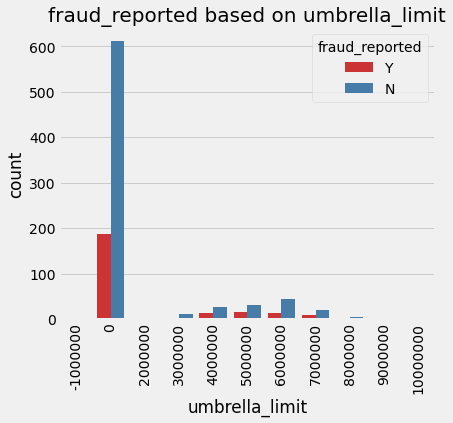

In [49]:
#lets see fraud_reported based on umbrella_limit

plt.figure(figsize = (6,5))
sns.countplot(x = 'umbrella_limit', hue = 'fraud_reported', data = df, palette = 'Set1')

plt.title('fraud_reported based on umbrella_limit',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

* An umbrella insurance policy is extra liability insurance coverage given to customers. here we can see it is mostly 0.

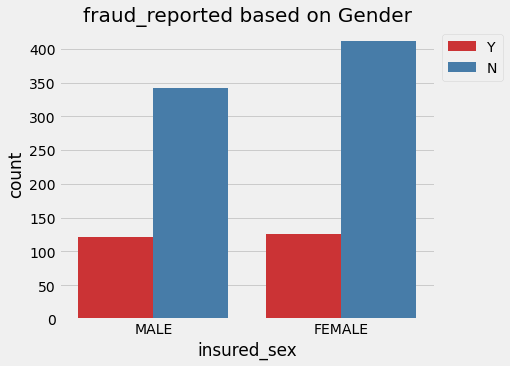

In [50]:
#lets see fraud_reported based on insured_sex

plt.figure(figsize = (6,5))
sns.countplot(x = 'insured_sex', hue = 'fraud_reported', data = df, palette = 'Set1')

plt.legend( bbox_to_anchor = (1, 1), loc = 'upper left')
plt.title('fraud_reported based on Gender',fontsize=20)

plt.show()

* We can say that the number of females is more than that of the males.

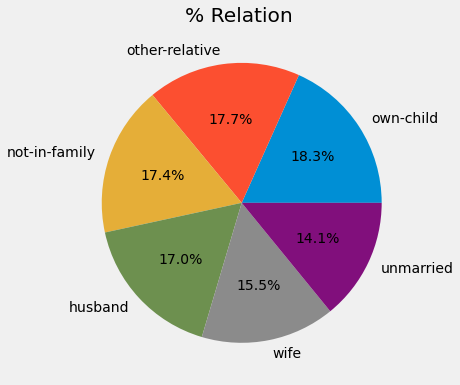

In [58]:
# Lets have a look on insured_relationship, how it is distributed
plt.figure(figsize=(10, 6))

plt.pie( df["insured_relationship"].value_counts().values,
        labels = df["insured_relationship"].value_counts().index, autopct='%1.1f%%')

plt.title('% Relation ')
plt.show()

* here we can see all kind of relation exists almost in equal percentage.

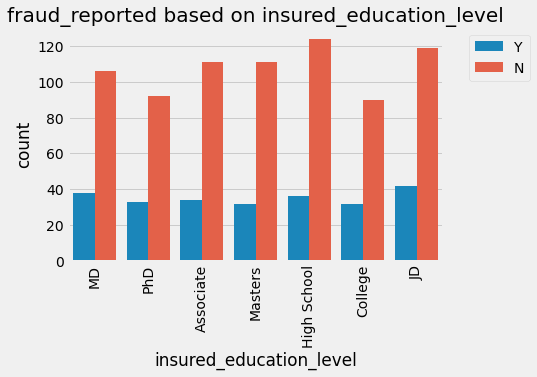

In [61]:
# lets check fraud_reported based on insured_education_level 

sns.countplot(x = 'insured_education_level', hue = 'fraud_reported', data = df)

plt.title('fraud_reported based on insured_education_level',fontsize=20)
plt.xticks(rotation = 90)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

* We can see that higher number of cases where customers educated till high school level. And it seems like getting fraud ratio nearly equal in all cases.

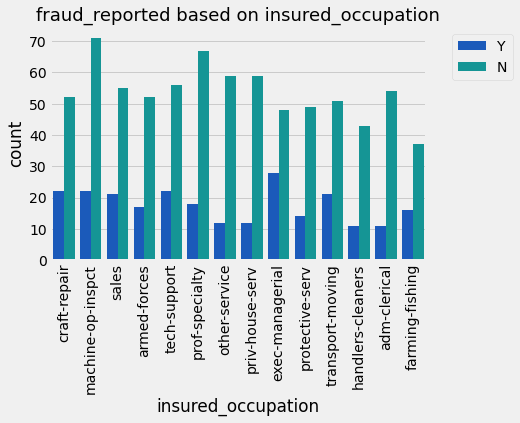

In [64]:
# lets check fraud_reported based on insured_occupation 

sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = df, palette = 'winter')

plt.title('fraud_reported based on insured_occupation',fontsize=18)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

* We can conclude that, the ratio of fraud to not a fraud is higher in case of exec-managerials compared to other categories.

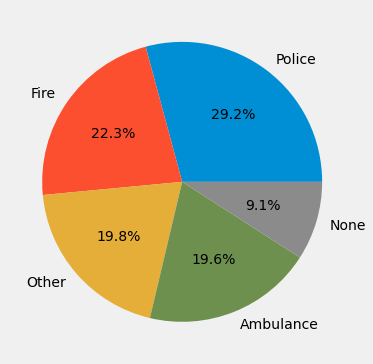

In [66]:
# Lets have a look on insured_relationship, how it is distributed
plt.figure(figsize=(10, 6))
plt.pie( df["authorities_contacted"].value_counts().values, labels = df["authorities_contacted"].value_counts().index, autopct='%1.1f%%')

plt.show()

* Here it is clear that, in 29.2% of cases applicant contacted to police and in 22.3% of cases to fire, and in 19.6% of cases they contacted to ambulance.

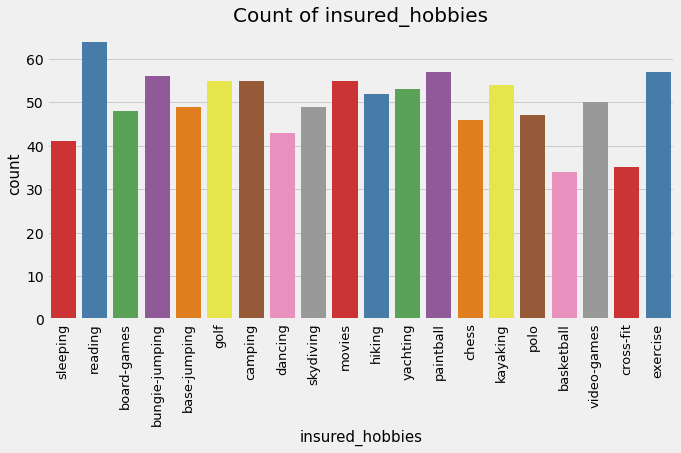

In [70]:
# visualizing the count of insured_hobbies.

plt.figure(figsize = (10,5))
sns.countplot(x='insured_hobbies', data=df, palette = 'Set1')

plt.title('Count of insured_hobbies',fontsize=20)
plt.xlabel('insured_hobbies',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* We can say more number of people are having hobbie of reading, exercise, paintball and very less number of people go for basketball and cross-fit.

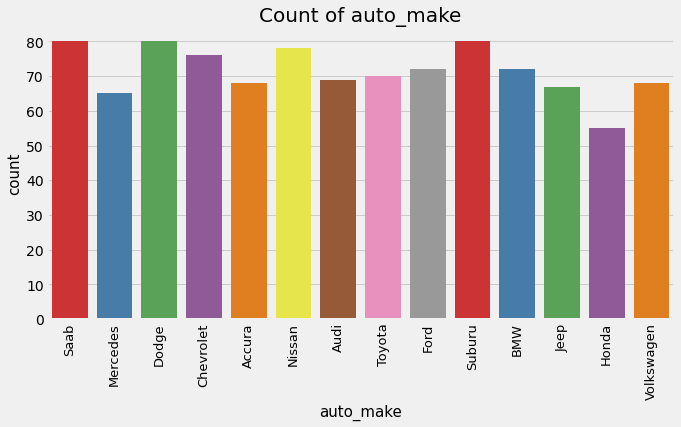

In [71]:
# visualizing the count of auto_make.

plt.figure(figsize = (10,5))
sns.countplot(x='auto_make', data=df, palette = 'Set1')

plt.title('Count of auto_make',fontsize=20)
plt.xlabel('auto_make',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=90)

plt.show()

* Here we can see that very less number of honda vehicles claimed for insurance compaired to others.

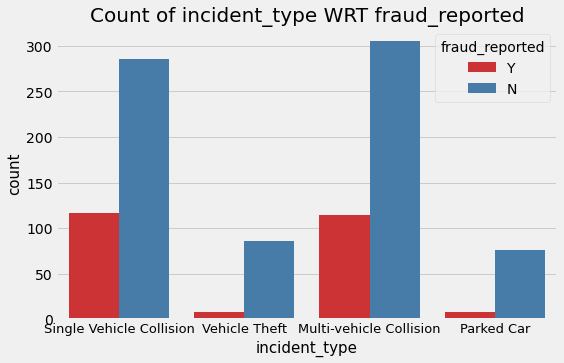

In [80]:
# visualizing the count of incident_type WRT fraud_reported.

plt.figure(figsize = (8,5))
sns.countplot(x = 'incident_type', hue = 'fraud_reported', data =df , palette = 'Set1')

plt.title('Count of incident_type WRT fraud_reported',fontsize=20)
plt.xlabel('incident_type',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13)

plt.show()

* By observing this plot we can say that more cases for insurance claims are from single Vehicle collision and Multi-vehicle collision, and fraud cases also more in these categories.

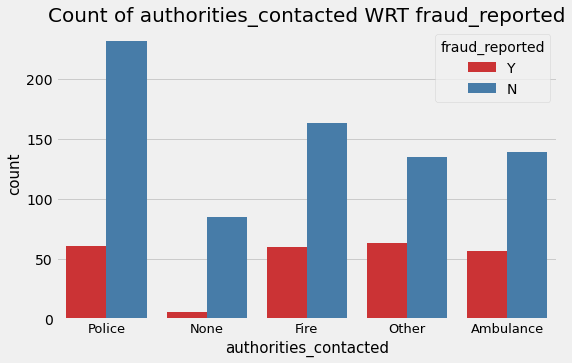

In [81]:
# visualizing the count of authorities_contacted WRT fraud_reported.

plt.figure(figsize = (8,5))
sns.countplot(x = 'authorities_contacted', hue = 'fraud_reported', data =df , palette = 'Set1')

plt.title('Count of authorities_contacted WRT fraud_reported',fontsize=20)
plt.xlabel('authorities_contacted',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=13)

plt.show()

* Here when authorities_contacted belongs to None category the cases of getting reported as a fraud are very less.


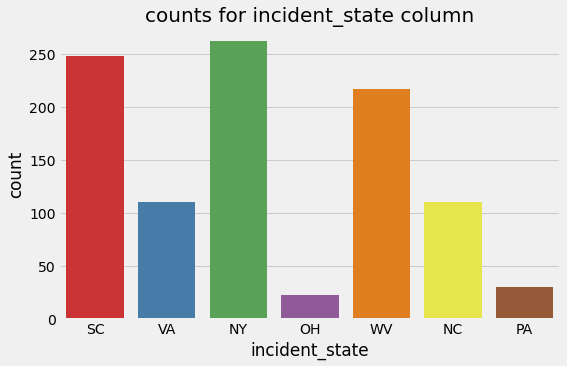

In [84]:
#lets check the counts for incident_state column

plt.figure(figsize = (8,5))
sns.countplot(x = 'incident_state',data = df, palette = 'Set1')
plt.title('counts for incident_state column',fontsize=20)
plt.show()

* There are large number of cases belongs to SC and NY and very less are belong to OH and PA.

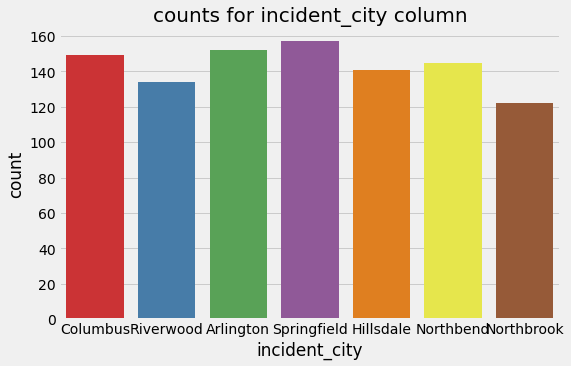

In [85]:
#lets check the counts for incident_city column

plt.figure(figsize = (8,5))
sns.countplot(x = 'incident_city',data = df, palette = 'Set1')
plt.title('counts for incident_city column',fontsize=20)
plt.show()

* This will tell us that more number of cases are from springfield, arlington and columbus cities.

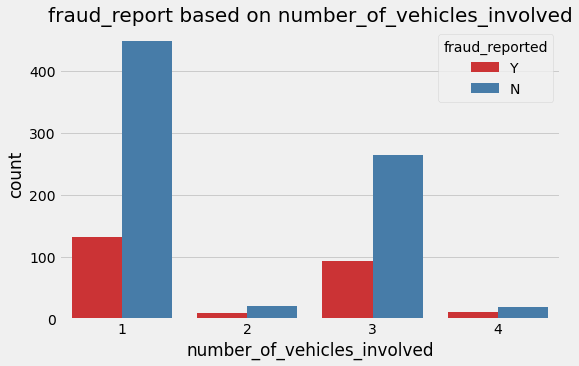

In [87]:
#lets check fraud_report based on number_of_vehicles_involved

plt.figure(figsize = (8,5))
sns.countplot(x = 'number_of_vehicles_involved', hue = 'fraud_reported', data = df,  palette = 'Set1')
plt.title('fraud_report based on number_of_vehicles_involved',fontsize=20)
plt.show()

* This will tell us that in most of the cases number of vehicles involved is 1 or 3, in this case the ratio of getting fraud is less when it is compared with number of vehicles involved is 4.

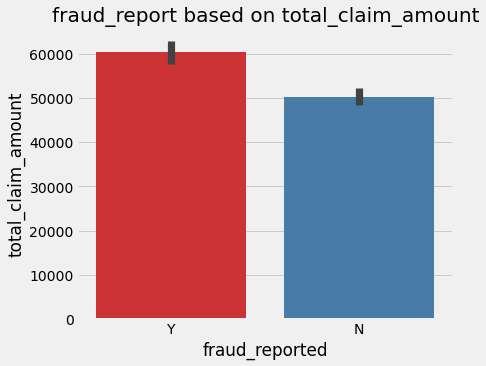

In [89]:
#lets check fraud_reported based on total_claim_amount

plt.figure(figsize = (6,5))
sns.barplot(x = 'fraud_reported', y = 'total_claim_amount', data = df, palette = 'Set1')
plt.title('fraud_report based on total_claim_amount',fontsize=20)

plt.show()

* We can say that when total claim ammount is above 50000, then mostly getting fraud is reported.

In [90]:
#lets have a look on different claims
claim = pd.DataFrame(df, columns = ['total_claim_amount','injury_claim','property_claim','vehicle_claim'])
claim.head(10)

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,71610,6510,13020,52080
1,5070,780,780,3510
2,34650,7700,3850,23100
3,63400,6340,6340,50720
4,6500,1300,650,4550
5,64100,6410,6410,51280
6,78650,21450,7150,50050
7,51590,9380,9380,32830
8,27700,2770,2770,22160
9,42300,4700,4700,32900


* By observing above data we can say that total claim is a sum of other claims like injury claims, property claim, vehicle claims.


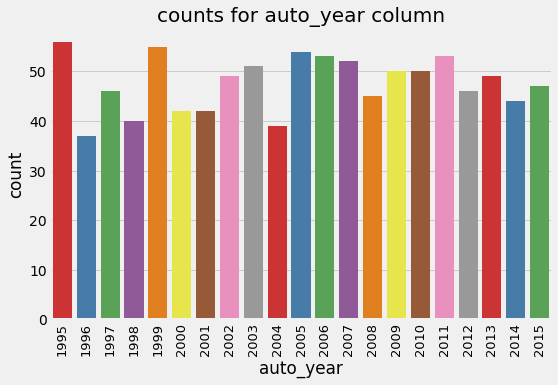

In [92]:
#lets check the counts for auto_year column

plt.figure(figsize = (8,5))
sns.countplot(x = 'auto_year',data = df, palette = 'Set1')
plt.title('counts for auto_year column',fontsize=20)
plt.xticks(fontsize=13 ,rotation=90)
plt.show()

* Looking at this plot we can say we are having the vehicles which are made since 1995 to 2015, less number of vehicles are there which are made in the year of 1996 and 2004.


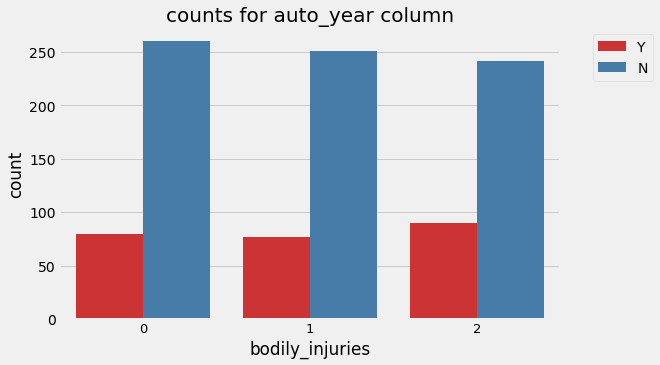

In [95]:
# lets check fraud report based on bodily_injuries

plt.figure(figsize = (8,5))
sns.countplot(x = 'bodily_injuries', hue = 'fraud_reported', data = df, palette = 'Set1')
plt.title('counts for auto_year column',fontsize=20)
plt.xticks(fontsize=13 )
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.show()

* we can observe that we have almost equal numbers of these three types in bodily_injuries with nearly equal ratio.

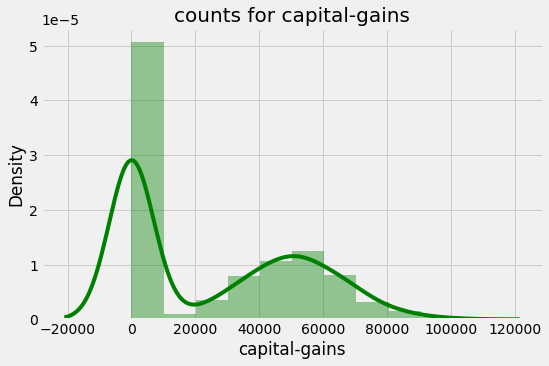

In [97]:
#lets have a look on capital gains

plt.figure(figsize = (8,5))
sns.distplot(df['capital-gains'], color = "g")
plt.title('counts for capital-gains',fontsize=20)

plt.show()

* capital gain is highly distributed at 0.

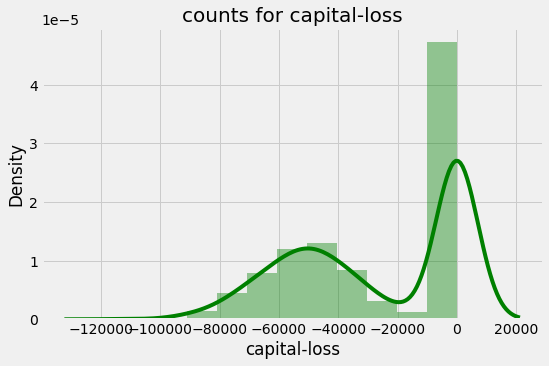

In [98]:
#lets have a look on capital loss

plt.figure(figsize = (8,5))
sns.distplot(df['capital-loss'], color = "g")
plt.title('counts for capital-loss',fontsize=20)

plt.show()

* capital loss is highly distributed at 0 and is in negative numbers.

## Preprocessing of data:

In [99]:
# lets replace the categorical data in columns property_damage and police_report_available with suitable number.
# replacing '?' with most frequent number of that column.

df['property_damage'].replace('YES', 1, inplace=True)
df['property_damage'].replace('NO', 0, inplace=True)
df['property_damage'].replace('?', 0, inplace=True)

df['police_report_available'].replace('YES', 1, inplace=True)
df['police_report_available'].replace('NO',0, inplace=True)
df['police_report_available'].replace('?', 0, inplace=True)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,Accura,RSX,2009,N


In [100]:
#lets drop unwanted columns
df.drop(columns = ['policy_number','policy_bind_date'], inplace = True)

* Because policy_number is just a identity number for particular policy and it is not contributing to target variable.
* And also policy_bind_date is not showing any relation with target variable

In [101]:
#lets replace label data with 0 & 1
df['fraud_reported'].replace('Y', 1, inplace = True)
df['fraud_reported'].replace('N', 0, inplace = True)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0


In [102]:
#check count for insured_zip
df[['insured_zip']].value_counts()

insured_zip
456602         2
446895         2
469429         2
477695         2
431202         2
              ..
477268         1
477260         1
476978         1
476737         1
430104         1
Length: 995, dtype: int64

* As insured_zip represents zip code we will make data type of column insured_zip as object.

In [103]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [104]:
# Lets use policy_csl and make two different columns
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [105]:
# lets Derive the age of the vehicle based on the year value by assuming the data is collected in the year 2018
df['vehicle_age'] = 2018 - df['auto_year']

In [106]:
#lets check dataset after updating
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,1,250,500,14
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,1,250,500,11
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,0,100,300,11
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500,4
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,0,500,1000,9


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   object 
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

By analysing,
* insured_zip has 995 different entries and incident_date contains data only from two months of 2015 so I decided to drop these columns as well.
* For policy_csl and auto_year I have derived separate columns so I am dropping these columns.

In [109]:
#lets drop unwanted columns
df.drop(columns = ["policy_csl","auto_year","incident_date","insured_zip",], inplace = True)

## checking correlation:

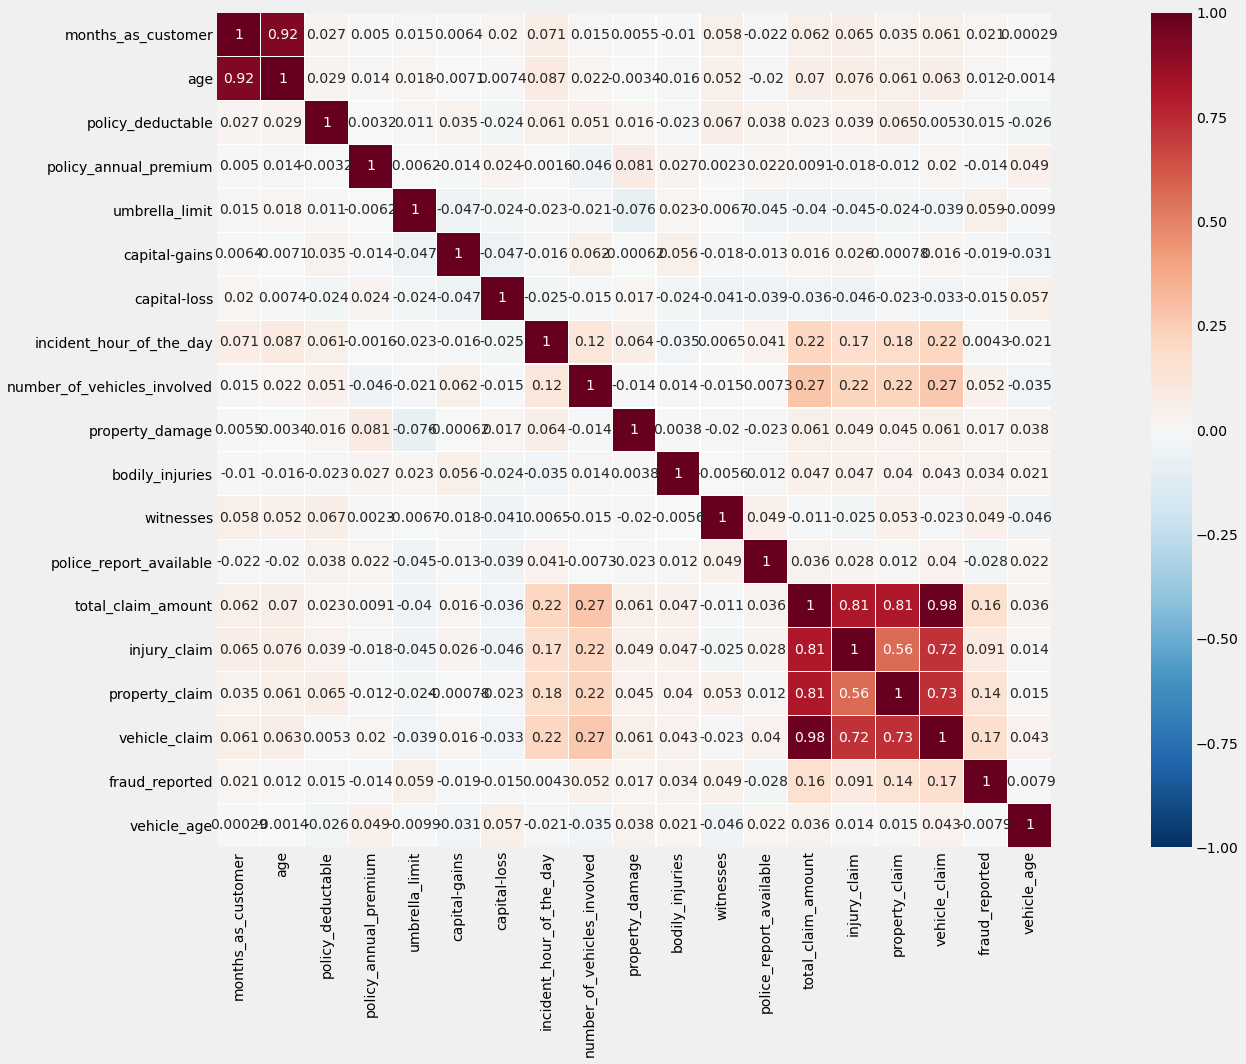

In [113]:
df_corr = df.corr()
plt.figure(figsize = (28,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1,cmap="RdBu_r")
plt.tight_layout()

It is visible from the heatmap and the table, that the relation of features vs target and features vs features. Also the positive and negative relationship can be seen
* total_cliam has 98% correlation with the vehicle claim .
* Also 92 % correlation exists between months as customer and age
* we can see all features are having very less coefficient of correlation with our target variable.
* total amount claim and vehicle claim having maximum correlation with target variable and that is of 0.16 and 0.17 respectively.
* age and months_as_customer columns are strongly related to each other.
* all four columns representing claim amounts are in good relation with each other.

In [114]:
#describe the data
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000,12.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,0.431483,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,3.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000,13.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000,18.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000,23.000000


## Checking for Outliers:

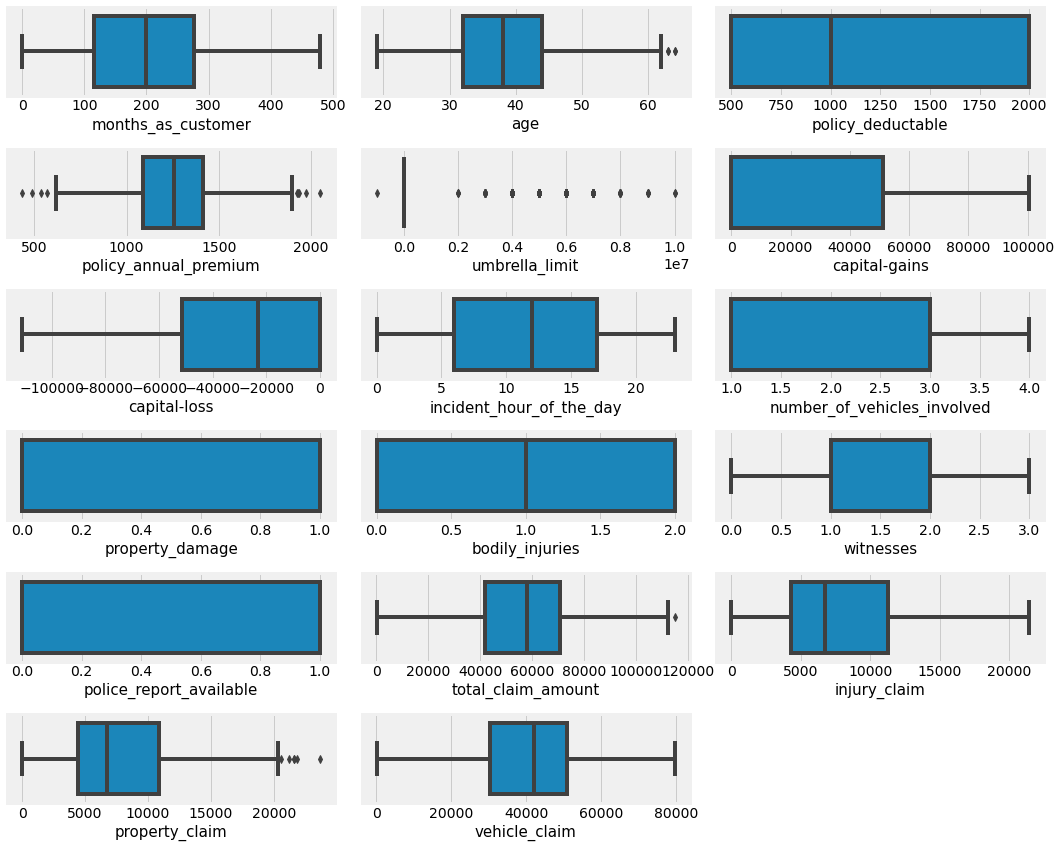

In [119]:
#lets check outliers from continuous columns

num_data = df._get_numeric_data()
plt.figure(figsize = (15,12), facecolor='white')
plotnumber = 1
for column in num_data:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.tight_layout()

* looking at above plots we can say there are some outliers present in age, policy_annual_premium, umbrella_limit,total_claim_amount and property_claim columns.we will remove it using zscore method.


## Removing Outliers:

In [120]:
#lets remove outliers using zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [121]:
df.shape

(981, 37)

* After removing the outliers we have 981 rows and 37 columns.

In [122]:
# checking the data loss
data_loss = (1000-981)/1000*100
print(f"""data_loss : {data_loss} %""")

data_loss : 1.9 %


* By removing outliers we are loosing almost 2% of data, which is acceptable.

In [123]:
#lets drop index column
df.drop(columns = 'index', inplace = True)

In [128]:
#lets check the skewness after removing outliers
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
fraud_reported                 1.189838
csl_per_person                 0.419579
csl_per_accident               0.615942
vehicle_age                    0.054033
dtype: float64

## Separate features and label as x and y respectively

In [125]:
# lets saperate label and features
x = df.drop(columns = 'fraud_reported')
y = df['fraud_reported']

In [126]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

**Removing skewness**

In [129]:
#Lets treat the skewness from numerical columns
for index in num.skew().index:
    if num.skew().loc[index]>0.5:
        num[index]=np.cbrt(num[index])
    if num.skew().loc[index]<-0.5:
        num[index]=np.log1p(num[index])

In [130]:
num.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.562687
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.428659
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -1.912453
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -1.939206
vehicle_age                    0.054033
dtype: float64

### StandardScaler:

In [131]:
#Lets bring all numerical features to common scale by applying standard scaler

scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [132]:
#combine both numerical and categorical features
X = pd.concat([num,cat], axis = 1)

## Lable Encoding:

In [133]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [134]:
#lets have a look at data after encoding
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model,csl_per_person,csl_per_accident
0,328,48,1000,1406.91,0.000000,53300,0,5,1.00000,1.0,...,3.0,0.0,4.0,4.0,1.0,977.0,10.0,1.0,1.0,2.0
1,228,42,2000,1197.22,5.550473,0,0,8,1.00000,0.0,...,0.0,1.0,4.0,5.0,5.0,616.0,8.0,12.0,1.0,2.0
2,134,29,2000,1413.14,5.550473,35100,0,7,1.44225,0.0,...,2.0,1.0,4.0,1.0,1.0,671.0,4.0,30.0,0.0,1.0
3,256,41,2000,1415.74,5.664061,48900,-62400,5,1.00000,0.0,...,1.0,0.0,4.0,2.0,0.0,656.0,3.0,34.0,1.0,2.0
4,228,44,1000,1583.91,5.664061,66000,-46000,20,1.00000,0.0,...,0.0,1.0,2.0,1.0,0.0,214.0,0.0,31.0,2.0,0.0


* **We knew that this is a case of imbalance, so will do oversampling.**

## Over sampling:

In [135]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [136]:
#lets check the target variable now
y_over.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

# Modelling:

### Finding best random state:

In [140]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(0,300):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu*100,"%"," on Random State",max_rs)

Best accuracy is 62.53369272237197 on Random State 171


* We got an accuracy score of 62% at a random state of 171.

### Creating Train_Test_Split:

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = max_rs)

## 1. LogisticRegression model:

In [146]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy,"%.")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100} %")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores,"%")

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 62.53369272237197 %.
roc_auc_score: 62.374104907725446%
---------------------------------------------------
Confusion Matrix : 
 [[128  65]
 [ 74 104]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.63      0.66      0.65       193
           1       0.62      0.58      0.60       178

    accuracy                           0.63       371
   macro avg       0.62      0.62      0.62       371
weighted avg       0.62      0.63      0.62       371


Cross validation score : 56.746780337384365 %

Accuracy Score - Cross Validation Score : 5.786912384987602


## 2. DecesionTreeClassifier model:

In [150]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy,'%')
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100} %")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores,'%')

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 81.40161725067385 %
roc_auc_score: 81.38208068929383 %
---------------------------------------------------
Confusion Matrix : 
 [[158  35]
 [ 34 144]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       193
           1       0.80      0.81      0.81       178

    accuracy                           0.81       371
   macro avg       0.81      0.81      0.81       371
weighted avg       0.81      0.81      0.81       371


Cross validation score : 82.60656629784148 %


Accuracy Score - Cross Validation Score : -1.2049490471676307


## 3. RandomForestClassifier model:

In [152]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy,'%')
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100} %")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores,'%')

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 86.52291105121293 %

roc_auc_score: 86.45718111428073 %
---------------------------------------------------
Confusion Matrix : 
 [[170  23]
 [ 27 151]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       193
           1       0.87      0.85      0.86       178

    accuracy                           0.87       371
   macro avg       0.87      0.86      0.86       371
weighted avg       0.87      0.87      0.87       371


Cross validation score : 86.38944313440959 %


Accuracy Score - Cross Validation Score : 0.13346791680334036


## 4. KNeighborsClassifier model:

In [153]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy,'%')
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100} %")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores,'%')

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 66.30727762803235 %
roc_auc_score: 66.8524771496769 %
---------------------------------------------------
Confusion Matrix : 
 [[103  90]
 [ 35 143]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.75      0.53      0.62       193
           1       0.61      0.80      0.70       178

    accuracy                           0.66       371
   macro avg       0.68      0.67      0.66       371
weighted avg       0.68      0.66      0.66       371


Cross validation score : 71.6628877199347 %


Accuracy Score - Cross Validation Score : -5.355610091902349


## 5. XGBClassifier model

In [154]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy,'%')
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100} %")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores,'%')

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 88.67924528301887 %
roc_auc_score: 88.74803516329976 %
---------------------------------------------------
Confusion Matrix : 
 [[168  25]
 [ 17 161]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       193
           1       0.87      0.90      0.88       178

    accuracy                           0.89       371
   macro avg       0.89      0.89      0.89       371
weighted avg       0.89      0.89      0.89       371


Cross validation score : 87.73716669689824 %

Accuracy Score - Cross Validation Score : 0.9420785861206298


## 6. ExtraTreesClassifier model:

In [155]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy,'%')
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100} %")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores,'%')

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 88.67924528301887 %
roc_auc_score: 88.74803516329976 %
---------------------------------------------------
Confusion Matrix : 
 [[168  25]
 [ 17 161]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       193
           1       0.87      0.90      0.88       178

    accuracy                           0.89       371
   macro avg       0.89      0.89      0.89       371
weighted avg       0.89      0.89      0.89       371


Cross validation score : 89.15109740613096 %

Accuracy Score - Cross Validation Score : -0.471852123112086


* Our XGBClassifier model and ExtraTreesClassifier model giving almost same accuracy results. but, 
* The difference between accuracy score and cross validation score of ExtraTreesClassifier model is very less compared to other models.
* So we can conclude that **'ExtraTreesClassifier model' as our best fitting model.**

## Hyper parameter tunning:

In [156]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[500,700,1000,1200],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [157]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(ExtraTreesClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [500, 700, 1000, 1200]})

In [158]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 700}

## Final model:

In [159]:
#lets check the results of final model with best parameters
model = ExtraTreesClassifier(criterion = 'gini', max_depth = 15, max_features = 'sqrt', min_samples_split = 2, n_estimators = 1000)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [160]:
print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 87.33153638814017%
--------------------------------------------------------
roc_auc_score: 87.34354078127727%
--------------------------------------------------------
Confusion Matrix : 
 [[168  25]
 [ 22 156]]

------------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       193
           1       0.86      0.88      0.87       178

    accuracy                           0.87       371
   macro avg       0.87      0.87      0.87       371
weighted avg       0.87      0.87      0.87       371



* The accuracy of the best model after tuning 87.33 % but it is less than the score before tunning. So we will save the model without tunning.

## AUC ROC Curve for final model


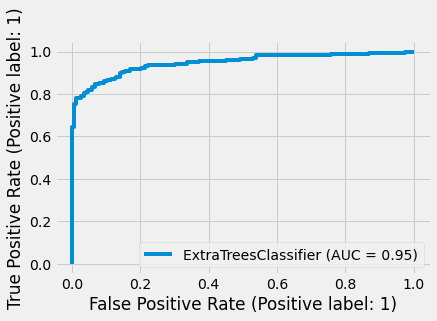

In [163]:
#Lets plot roc curve and check auc and performance
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_test, y_test)
plt.show()

* **Lets plot roc curve and check auc and performance of ExtraTreesClassifier model before hyper tunning.**

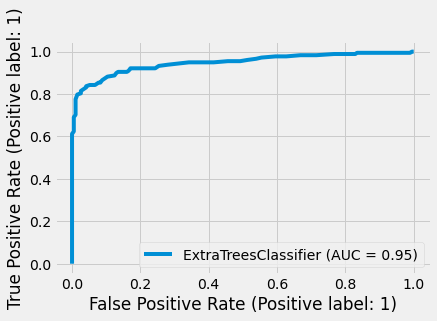

In [166]:
# Lets plot roc curve model before hyper tunning
plot_roc_curve(ext, x_test, y_test)
plt.show()

# Model saving:

In [167]:
# saving model without tunning (because it gives better score)

import joblib
joblib.dump(ext,"Insurance_Fraud_Detection.pkl")

['Insurance_Fraud_Detection.pkl']

# Conclusion :-
* we can see all features are having very less coefficient of correlation with our target variable.
* total amount claim and vehicle claim having maximum correlation with target variable and that is of 0.16 and 0.17 respectively.
* age and months_as_customer columns are strongly related to each other.
* all four columns representing claim amounts are in good relation with each other. 
* Our XGBClassifier model and ExtraTreesClassifier model giving almost same accuracy results. but, 
* The difference between accuracy score and cross validation score of ExtraTreesClassifier model is very less compared to other models.
* So we can conclude that **'ExtraTreesClassifier model' as our best fitting model.**